# USA
- stephen nedoroscik

# Scaling had no effect

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, fbeta_score
from sklearn.ensemble import AdaBoostClassifier


In [2]:
df = pd.read_csv('../../Combine_Data/men/ph_encoded.csv')
olymp = pd.read_csv('../../Data/cleandata22-23/encoded_m_olympics_ph.csv')
phnames = pd.read_csv('../../Data/cleandata22-23/encoded_m_olympics_phnames.csv')
pholymp = pd.read_csv('../../Data/cleandata22-23/men22_23.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         535 non-null    int64  
 1   D            535 non-null    float64
 2   E            535 non-null    float64
 3   ND           535 non-null    float64
 4   Total        535 non-null    float64
 5   year         535 non-null    int64  
 6   medal        535 non-null    int64  
 7   Name         535 non-null    int64  
 8   Nation       535 non-null    int64  
 9   round_final  535 non-null    bool   
 10  round_qual   535 non-null    bool   
dtypes: bool(2), float64(4), int64(5)
memory usage: 38.8 KB


In [4]:
df.head()

,Rank,D,E,ND,Total,year,medal,Name,Nation,round_final,round_qual
0,1,6.5,8.766,0.0,15.266,2019,1,173,78,True,False
1,2,6.5,8.733,0.0,15.233,2019,0,319,13,True,False
2,3,6.5,8.166,0.0,14.666,2019,0,303,40,True,False
3,4,6.1,7.600,0.0,13.700,2019,0,297,11,True,False
4,5,5.9,7.233,0.0,13.133,2019,0,98,72,True,False


In [5]:
df['medal'].value_counts()

medal
0    525
1     10
Name: count, dtype: int64

In [6]:
# y = df['medal']
# X = df.drop(columns=['medal'])

# # Split the data into training and testing sets
# # CHANGED RANDOM STATE TO HAVE A LARGER NUMBER OF VALUES IN TEST DF
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=70)

# # Initialize classifiers
# classifiers = {
#     "Random Forest": RandomForestClassifier(),
#     "AdaBoost": AdaBoostClassifier(),
#     "SVM": SVC(),
#     "K-Nearest Neighbors": KNeighborsClassifier(),
#     "Decision Tree": DecisionTreeClassifier(),
#     "Naive Bayes": GaussianNB(),
#     "Neural Network": MLPClassifier(),
# }

# results = {}

# # Iterate through each classifier
# for name, clf in classifiers.items():
#     # Create a pipeline with StandardScaler for classifiers that require it
#     if name in ["SVM", "K-Nearest Neighbors", "Neural Network"]:
#         clf = make_pipeline(StandardScaler(), clf)

#     # Fit the model to the training data
#     clf.fit(X_train, y_train)

#     # Make predictions on the test data
#     y_pred = clf.predict(X_test)

#     # Evaluate the model's performance
#     accuracy = accuracy_score(y_test, y_pred)
#     report = classification_report(y_test, y_pred)
#     conf_matrix = confusion_matrix(y_test, y_pred)

#     results[name] = {
#         "accuracy": accuracy,
#         "classification_report": report,
#         "confusion_matrix": conf_matrix,
#     }

# # Print the results
# for name, result in results.items():
#     print(f"Classifier: {name}")
#     print(f"Accuracy: {result['accuracy']:.4f}")
#     print(f"Classification Report:\n{result['classification_report']}")
#     print(f"Confusion Matrix:\n{result['confusion_matrix']}\n")


Classifier: Random Forest, AdaBoost, and Decision Tree
Accuracy: 0.9904

In [9]:
data = df.copy()

y = data['medal']
X = data.drop(columns=['medal'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=70)

# Initialize the AdaBoost classifier
clf = AdaBoostClassifier()

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate F2-Measure
beta = 2
f2_measure = fbeta_score(y_test, y_pred, beta=beta)

# Print the results
print("AdaBoost Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"F2-Measure: {f2_measure:.4f}")


AdaBoost Classifier
Accuracy: 0.9857
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        68
           1       1.00      0.50      0.67         2

    accuracy                           0.99        70
   macro avg       0.99      0.75      0.83        70
weighted avg       0.99      0.99      0.98        70

Confusion Matrix:
[[68  0]
 [ 1  1]]
F2-Measure: 0.5556


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

data = df.copy()  

y = data['medal']
X = data.drop(columns=['medal'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=70)

# Initialize the AdaBoost classifier
clf = AdaBoostClassifier()

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("AdaBoost Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")

AdaBoost Classifier
Accuracy: 0.9857
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        68
           1       1.00      0.50      0.67         2

    accuracy                           0.99        70
   macro avg       0.99      0.75      0.83        70
weighted avg       0.99      0.99      0.98        70

Confusion Matrix:
[[68  0]
 [ 1  1]]


# Feature Importance

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

y = df['medal']
X = df.drop(columns=['medal'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=70)

# Initialize the AdaBoost classifier
clf = AdaBoostClassifier()

# Fit the model to the training data
clf.fit(X_train, y_train)

# Extract feature importances
feature_importances = clf.feature_importances_

# Print feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")


Feature Importances:
Rank: 0.2000
D: 0.1400
E: 0.0600
ND: 0.0000
Total: 0.1200
year: 0.0200
Name: 0.3600
Nation: 0.0800
round_final: 0.0200
round_qual: 0.0000


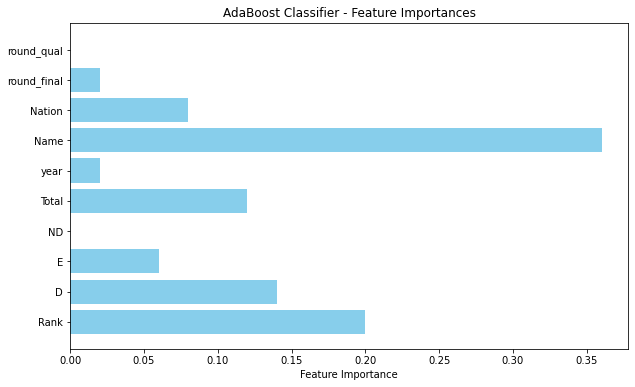

In [12]:
import matplotlib.pyplot as plt

feature_importances = clf.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('AdaBoost Classifier - Feature Importances')
plt.show()


In [66]:
olymp = pd.read_csv('../../Data/cleandata22-23/encoded_m_olympics_ph.csv')


In [67]:
olymp.rename(columns={'D Score': 'D', 'E Score': 'E',
                     'Pen.': 'ND', 'nation': 'Nation'}, inplace=True)

In [68]:
olymp=olymp.drop(columns=['round_TeamFinal', 'round_AAfinal', 'round_TeamQual'])

In [69]:
y_predz = clf.predict(olymp)

In [70]:
ypreds  = pd.Series(y_predz)
olymp['ypredz']=ypreds

In [71]:
olymp['ypredz'].value_counts()


ypredz
0    2557
1       1
Name: count, dtype: int64

In [72]:
filtered_df = olymp[olymp['ypredz'] == 1]

In [73]:
filtered_df['Name'].unique()

array([185])

In [74]:
name_encoded_values = [185]

# Filter the DataFrame to get the corresponding "Name" values
result = phnames.loc[phnames['Name_encoded'].isin(name_encoded_values), 'Name']


In [75]:
result.unique()

array(['edoardo de rosa'], dtype=object)

In [76]:
pholymp["Name"]=pholymp["Name"].str.lower()

In [77]:
names_to_filter = ['nariman kurbanov', 'joshua nathan', 'stephen nedoroscik',
       'max whitlock', 'max whitlock obe']

# Filter the DataFrame to get rows with the specified "Name" values
result = pholymp[pholymp['Name'].isin(names_to_filter)]

In [26]:
result['Country'].value_counts()

Country
GBR    57
KAZ    31
USA    12
Name: count, dtype: int64

In [27]:
usas=result[result['Country']=='USA']

In [28]:
usas['Name'].unique()

array(['stephen nedoroscik'], dtype=object)